<h1>EXPLORATION 1 : 가위바위보 분류기를 만들자<h1>

<h4>준비 데이터 : 학습데이터 300개 (가위 100개, 바위 100개, 보 100개)<br>
                테스트 데이터 3000개 (가위 1000개, 바위 1000개, 보 1000개) <h4>

데이터 불러오기 + Resize 하기

In [1]:
from PIL import Image
import os, glob

#PIL 라이브러리 import

import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


학습 데이터 라벨링

In [2]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path,300)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


학습한 이미지 불러오기

라벨:  0


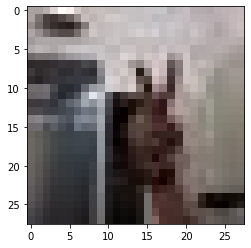

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

딥러닝 네트워크 설계하기

In [4]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


딥러닝 네트워크 학습시키기

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))


model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (

얼마나 잘 만들었는지 확인하기(테스트) notion 자료실에 업로드 된 자료 10개 (3000개: 가위 1000개, 바위 1000개, 보 1000개) 이용

In [7]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")


    

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 3000)

x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

PIL 라이브러리 import 완료!
1000  images to be resized.
1000  images resized.
가위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
바위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
보 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_test shape: (3000, 28, 28, 3)
y_test shape: (3000,)


위에서 훈련시킨 model을 사용하여 test_accuracy를 측정

94/94 - 1s - loss: 1.9650 - accuracy: 0.3357
test_loss : 1.964992880821228
test_accuracy : 0.3356666564941406
model.predict() 결과 :  [0.14868304 0.7073017  0.14401527]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


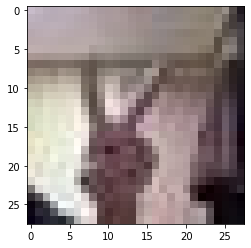

예측확률분포: [0.8596508  0.00681608 0.13353315]
라벨: 2, 예측결과: 0


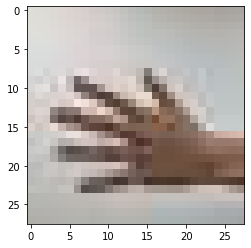

예측확률분포: [0.00585597 0.9113736  0.08277046]
라벨: 0, 예측결과: 1


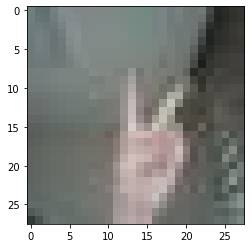

예측확률분포: [0.8160375  0.00125651 0.18270595]
라벨: 2, 예측결과: 0


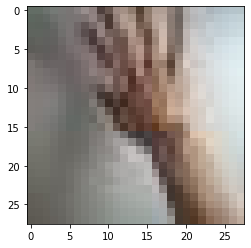

예측확률분포: [0.4068035  0.00274881 0.59044766]
라벨: 1, 예측결과: 2


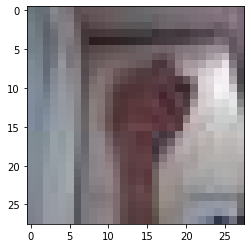

예측확률분포: [5.0282787e-04 4.8149329e-01 5.1800382e-01]
라벨: 1, 예측결과: 2


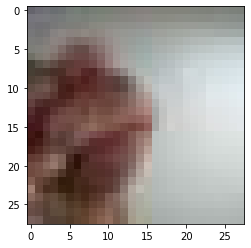

예측확률분포: [0.12808405 0.7442324  0.12768358]
라벨: 0, 예측결과: 1


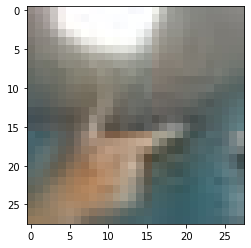

예측확률분포: [0.9616087  0.03408828 0.00430291]
라벨: 1, 예측결과: 0


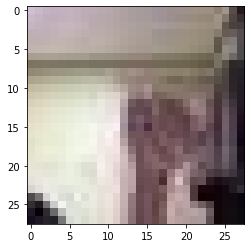

예측확률분포: [0.48475158 0.00485775 0.5103907 ]
라벨: 1, 예측결과: 2


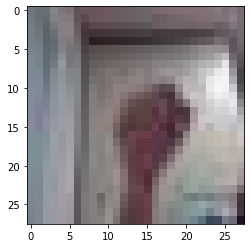

예측확률분포: [0.3091761  0.5849147  0.10590921]
라벨: 0, 예측결과: 1


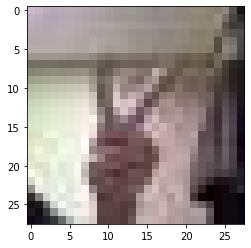

예측확률분포: [0.55220425 0.41241735 0.0353784 ]
라벨: 2, 예측결과: 0


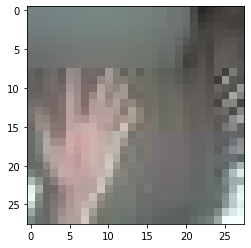

In [8]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

결과를 보니.. 정확도는 40%도 못넘고 랜덤으로 10개를 뽑아서 나온 결과를 봐도.. 엉망이다... 정확도 60%를 넘기기 위해서 문제 파악 시도하기...

딥러닝 네트워크 학습 방법 수정 시도

합성곱 층 Conv2D추가

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))



model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Model에 추가된 Layer 개수:  8
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (

새로 훈련시킨 model을 사용하여 test_accuracy를 측정

94/94 - 1s - loss: 2.4653 - accuracy: 0.3547
test_loss : 2.465257406234741
test_accuracy : 0.35466668009757996
model.predict() 결과 :  [0.00369029 0.25871146 0.73759824]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


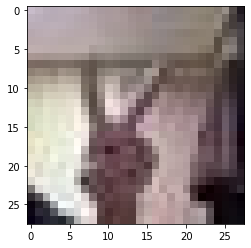

예측확률분포: [0.01015356 0.42536157 0.56448483]
라벨: 0, 예측결과: 2


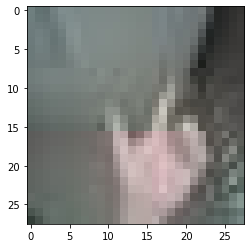

예측확률분포: [0.24332002 0.026165   0.730515  ]
라벨: 0, 예측결과: 2


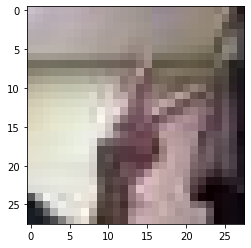

예측확률분포: [0.4951543  0.21511756 0.28972813]
라벨: 1, 예측결과: 0


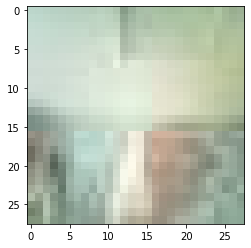

예측확률분포: [0.11929477 0.00165215 0.87905306]
라벨: 1, 예측결과: 2


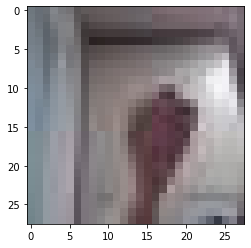

예측확률분포: [0.08954125 0.0728881  0.83757067]
라벨: 1, 예측결과: 2


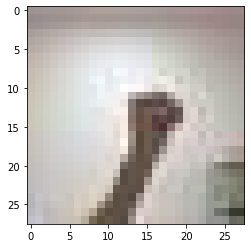

예측확률분포: [0.00673576 0.03082313 0.96244115]
라벨: 1, 예측결과: 2


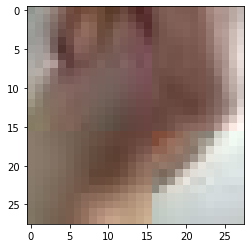

예측확률분포: [0.27799597 0.07146376 0.65054023]
라벨: 1, 예측결과: 2


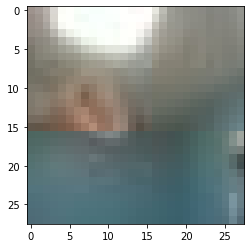

예측확률분포: [0.20362806 0.014886   0.7814859 ]
라벨: 1, 예측결과: 2


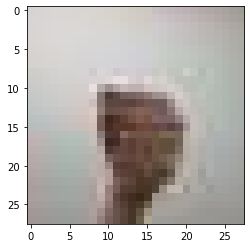

예측확률분포: [6.2691577e-04 2.6314609e-02 9.7305852e-01]
라벨: 1, 예측결과: 2


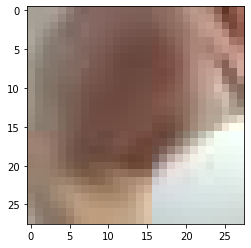

예측확률분포: [7.9069817e-01 7.4747327e-04 2.0855431e-01]
라벨: 1, 예측결과: 0


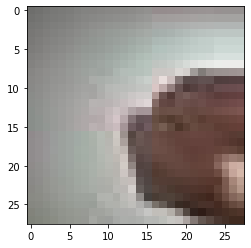

In [10]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

살짝... 올랐지만... 갈길이 멀었...

Max pooling 층 MaxPooling2D 추가와 학습횟수 증가시도

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))


model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

Model에 추가된 Layer 개수:  9
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (

다시 훈련시킨 model을 사용하여 test_accuracy를 측정

94/94 - 0s - loss: 2.0642 - accuracy: 0.3977
test_loss : 2.064192771911621
test_accuracy : 0.39766666293144226
model.predict() 결과 :  [0.27954566 0.01905151 0.70140284]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


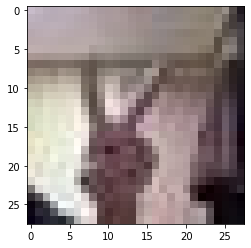

예측확률분포: [9.9292904e-01 3.5304896e-04 6.7179357e-03]
라벨: 1, 예측결과: 0


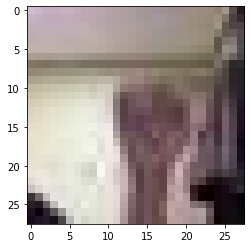

예측확률분포: [0.00459112 0.00545529 0.9899536 ]
라벨: 1, 예측결과: 2


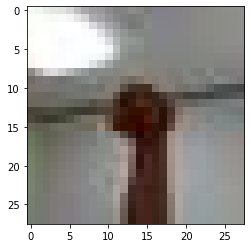

예측확률분포: [0.14463255 0.00779707 0.8475704 ]
라벨: 0, 예측결과: 2


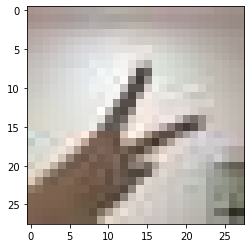

예측확률분포: [1.1909601e-04 2.1979528e-02 9.7790134e-01]
라벨: 1, 예측결과: 2


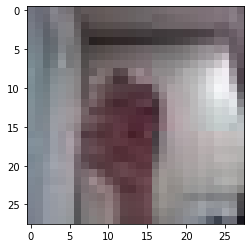

예측확률분포: [1.0233526e-02 7.0399692e-04 9.8906249e-01]
라벨: 0, 예측결과: 2


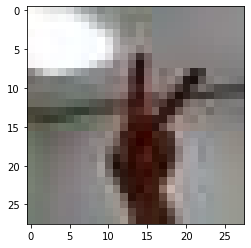

예측확률분포: [0.0214914  0.05536145 0.9231472 ]
라벨: 0, 예측결과: 2


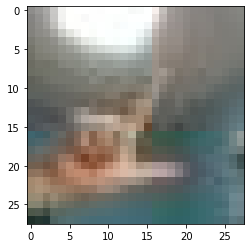

예측확률분포: [0.6630868 0.0129454 0.3239678]
라벨: 1, 예측결과: 0


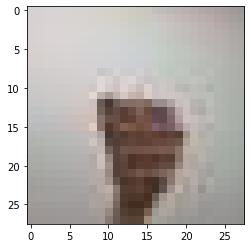

예측확률분포: [4.2808204e-04 1.2218915e-01 8.7738281e-01]
라벨: 1, 예측결과: 2


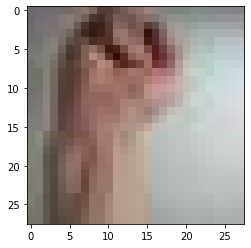

예측확률분포: [0.0423148  0.05899424 0.898691  ]
라벨: 0, 예측결과: 2


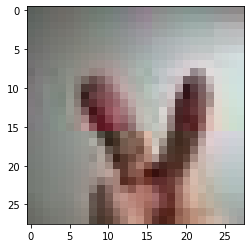

예측확률분포: [0.03137877 0.03640724 0.932214  ]
라벨: 1, 예측결과: 2


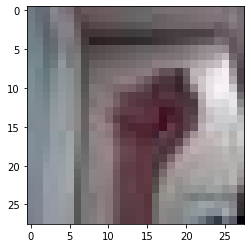

In [12]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

더 나아지긴 했다...
 Conv2D 층의 filters 값을 증가 시켜보자...

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))


model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

Model에 추가된 Layer 개수:  9
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 3, 128)         147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (

다시 훈련시킨 model을 사용하여 test_accuracy를 측정

94/94 - 2s - loss: 1.9661 - accuracy: 0.4103
test_loss : 1.966055989265442
test_accuracy : 0.4103333353996277
model.predict() 결과 :  [0.9869551 0.0010638 0.0119811]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


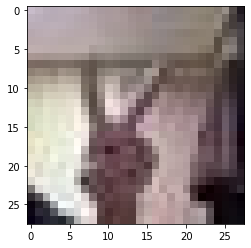

예측확률분포: [1.1010546e-01 2.1059908e-05 8.8987350e-01]
라벨: 0, 예측결과: 2


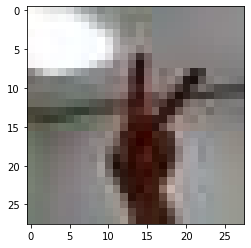

예측확률분포: [0.9159032  0.00506655 0.07903019]
라벨: 1, 예측결과: 0


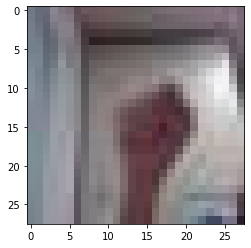

예측확률분포: [0.11702028 0.77915686 0.10382283]
라벨: 2, 예측결과: 1


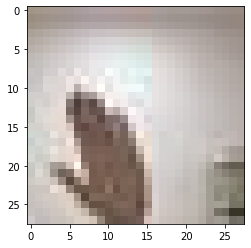

예측확률분포: [0.8223586  0.0785633  0.09907808]
라벨: 2, 예측결과: 0


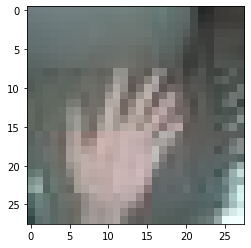

예측확률분포: [0.04213626 0.0016314  0.9562323 ]
라벨: 0, 예측결과: 2


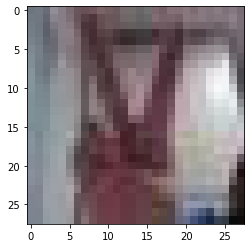

예측확률분포: [0.13204184 0.03282883 0.8351294 ]
라벨: 1, 예측결과: 2


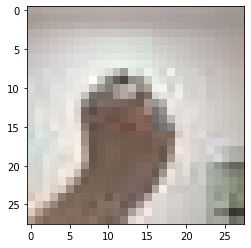

예측확률분포: [0.28158242 0.6528628  0.06555483]
라벨: 0, 예측결과: 1


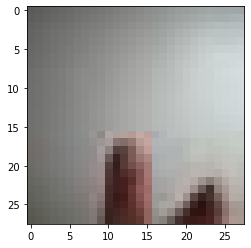

예측확률분포: [9.6707267e-01 6.2105118e-04 3.2306228e-02]
라벨: 2, 예측결과: 0


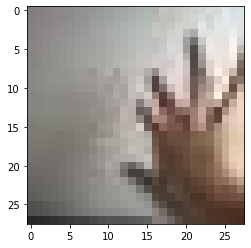

예측확률분포: [0.92607206 0.02122166 0.0527063 ]
라벨: 1, 예측결과: 0


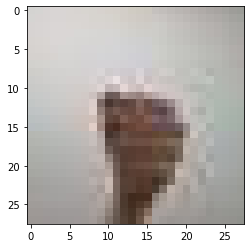

예측확률분포: [0.4278008  0.00151972 0.5706795 ]
라벨: 0, 예측결과: 2


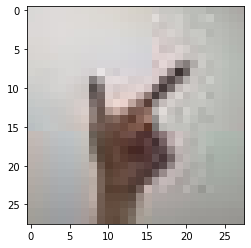

In [14]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

정확도가 확~ 올라갈 생각을 안한다... 학습 데이터와 테스트 데이터 소스에 문제가 있는게 아닐까? 학습 데이터와 테스트 데이터를 확인해보자..

우선 학습 데이터를 정확한 포즈로 새로 준비하고 양도 두배로 늘려보자...

새로 생성한 학습데이터를 데이터 불러오기 + Resize 하기

In [17]:
from PIL import Image
import os, glob

#PIL 라이브러리 import

import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/2nd_rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/2nd_rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/2nd_rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

200  images to be resized.
200  images resized.
가위 이미지 resize 완료!
200  images to be resized.
200  images resized.
바위 이미지 resize 완료!
200  images to be resized.
200  images resized.
보 이미지 resize 완료!


새로 생성한 학습 데이터 라벨링

In [18]:
import numpy as np

def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/2nd_rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path,600)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 600 입니다.
x_train shape: (600, 28, 28, 3)
y_train shape: (600,)


학습한 이미지 불러오기

라벨:  0


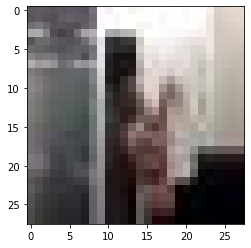

In [19]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

딥러닝 네트워크 설계하기 2탄

In [20]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


딥러닝 네트워크 학습시키기

In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))


model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Model에 추가된 Layer 개수:  7
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_11 (Dense)             (

1차 시도에서 사용한 데이터로 테스트 notion 자료실에 업로드 된 자료 10개 (3000개: 가위 1000개, 바위 1000개, 보 1000개) 이용

In [22]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/2nd_rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/2nd_rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/2nd_rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")


    

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/2nd_rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 3000)

x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

PIL 라이브러리 import 완료!
1000  images to be resized.
1000  images resized.
가위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
바위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
보 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_test shape: (3000, 28, 28, 3)
y_test shape: (3000,)


위에서 훈련시킨 model을 사용하여 test_accuracy를 측정

94/94 - 0s - loss: 4.2434 - accuracy: 0.4033
test_loss : 4.2434282302856445
test_accuracy : 0.4033333361148834
model.predict() 결과 :  [9.995509e-01 5.511842e-07 4.485126e-04]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


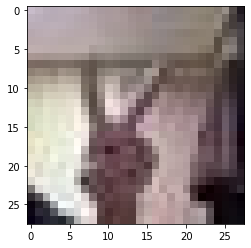

예측확률분포: [0.01790661 0.00152767 0.98056567]
라벨: 1, 예측결과: 2


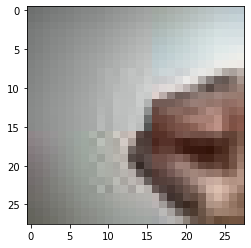

예측확률분포: [7.5741289e-03 3.9798752e-04 9.9202794e-01]
라벨: 0, 예측결과: 2


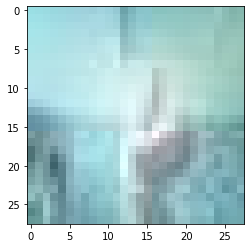

예측확률분포: [1.5424455e-03 6.5850711e-04 9.9779898e-01]
라벨: 0, 예측결과: 2


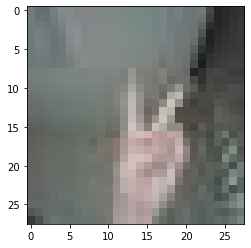

예측확률분포: [0.735949   0.00101356 0.2630374 ]
라벨: 1, 예측결과: 0


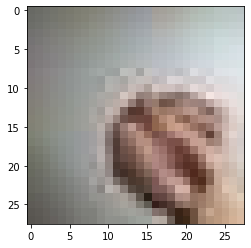

예측확률분포: [1.9517125e-01 3.8703938e-06 8.0482489e-01]
라벨: 1, 예측결과: 2


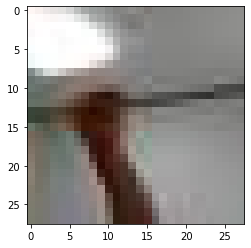

예측확률분포: [6.4377648e-01 1.3956707e-04 3.5608399e-01]
라벨: 1, 예측결과: 0


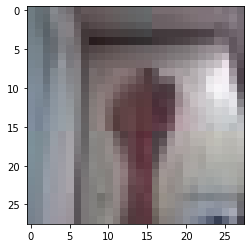

예측확률분포: [9.7327721e-01 3.2896062e-06 2.6719529e-02]
라벨: 2, 예측결과: 0


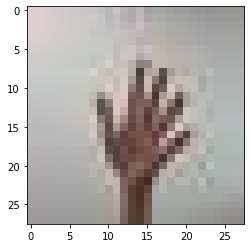

예측확률분포: [0.15861936 0.00986989 0.8315107 ]
라벨: 1, 예측결과: 2


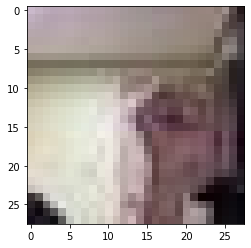

예측확률분포: [0.03727275 0.00136563 0.96136165]
라벨: 0, 예측결과: 2


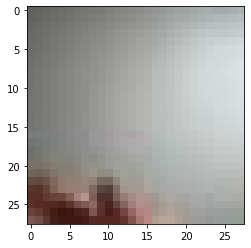

예측확률분포: [9.9965501e-01 5.2322122e-07 3.4455679e-04]
라벨: 1, 예측결과: 0


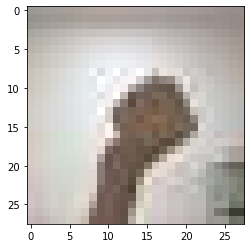

In [23]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

학습 데이터를 손봐도 40%를 넘길정도만... 
합성곱 층 Conv2D추가

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))



model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Model에 추가된 Layer 개수:  8
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_12 (Dense)             (

새로 훈련시킨 model을 사용하여 test_accuracy를 측정

94/94 - 0s - loss: 4.8987 - accuracy: 0.3830
test_loss : 4.898660182952881
test_accuracy : 0.382999986410141
model.predict() 결과 :  [9.5994258e-01 1.8140781e-04 3.9876051e-02]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


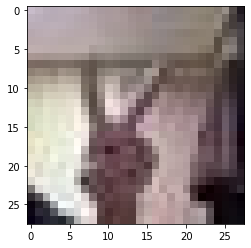

예측확률분포: [3.3530566e-06 9.6138219e-06 9.9998701e-01]
라벨: 1, 예측결과: 2


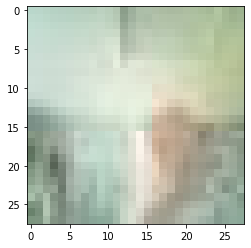

예측확률분포: [1.3591122e-04 3.5218567e-05 9.9982882e-01]
라벨: 0, 예측결과: 2


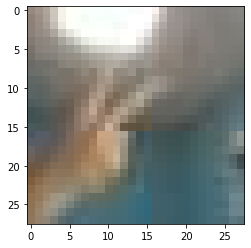

예측확률분포: [6.1308866e-04 5.8381219e-04 9.9880314e-01]
라벨: 1, 예측결과: 2


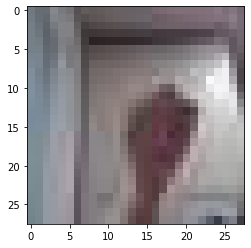

예측확률분포: [2.2997033e-02 1.7469535e-04 9.7682834e-01]
라벨: 1, 예측결과: 2


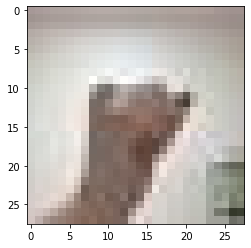

예측확률분포: [3.7234800e-05 1.5698145e-04 9.9980575e-01]
라벨: 1, 예측결과: 2


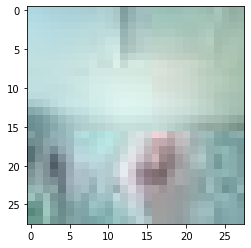

예측확률분포: [1.1806407e-02 5.0662755e-04 9.8768693e-01]
라벨: 1, 예측결과: 2


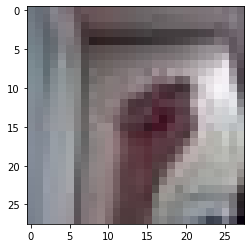

예측확률분포: [2.47616263e-05 1.03069106e-04 9.99872208e-01]
라벨: 1, 예측결과: 2


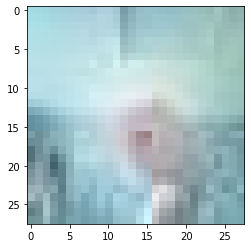

예측확률분포: [2.3284094e-05 3.6994572e-06 9.9997306e-01]
라벨: 1, 예측결과: 2


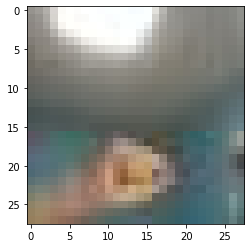

예측확률분포: [1.4846750e-03 9.6866938e-07 9.9851435e-01]
라벨: 0, 예측결과: 2


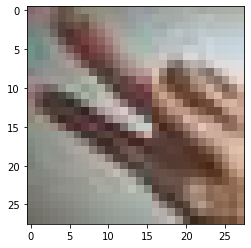

예측확률분포: [1.0058467e-03 4.1081887e-04 9.9858332e-01]
라벨: 1, 예측결과: 2


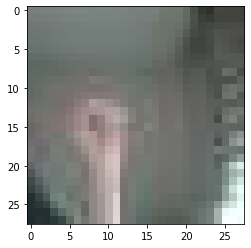

In [25]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

오히려 떨어짐... Max pooling 층 MaxPooling2D 추가와 학습횟수 증가시도

In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))


model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

Model에 추가된 Layer 개수:  9
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (

다시 훈련시킨 model을 사용하여 test_accuracy를 측정

94/94 - 0s - loss: 3.0904 - accuracy: 0.3710
test_loss : 3.0903971195220947
test_accuracy : 0.3709999918937683
model.predict() 결과 :  [0.1288384  0.07869186 0.7924698 ]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


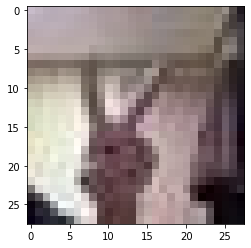

예측확률분포: [0.02990958 0.7182664  0.251824  ]
라벨: 2, 예측결과: 1


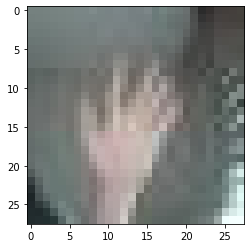

예측확률분포: [0.0020839  0.18883803 0.8090781 ]
라벨: 0, 예측결과: 2


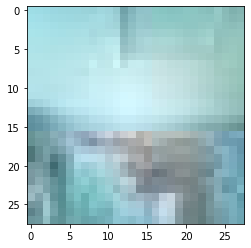

예측확률분포: [0.03041204 0.3582521  0.6113359 ]
라벨: 0, 예측결과: 2


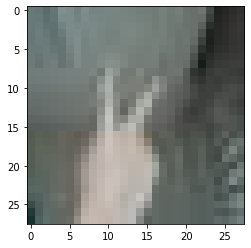

예측확률분포: [4.9910564e-02 1.1663498e-04 9.4997275e-01]
라벨: 1, 예측결과: 2


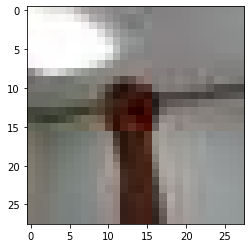

예측확률분포: [0.7125174  0.00727518 0.28020748]
라벨: 2, 예측결과: 0


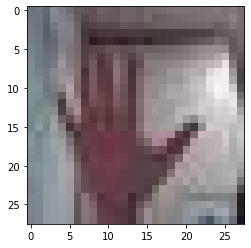

예측확률분포: [0.05956081 0.0024914  0.93794775]
라벨: 1, 예측결과: 2


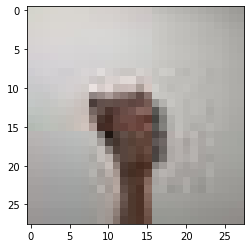

예측확률분포: [8.3578107e-06 8.3040031e-05 9.9990857e-01]
라벨: 1, 예측결과: 2


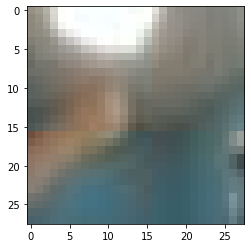

예측확률분포: [9.9467540e-01 1.4930213e-05 5.3096754e-03]
라벨: 1, 예측결과: 0


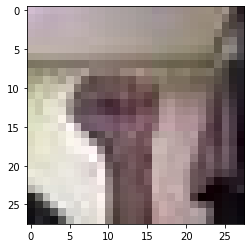

예측확률분포: [0.12116654 0.05310802 0.8257255 ]
라벨: 0, 예측결과: 2


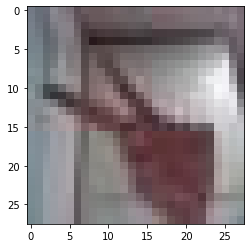

예측확률분포: [0.162773   0.12527531 0.71195173]
라벨: 0, 예측결과: 2


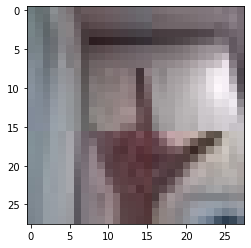

In [27]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

앗 정확도가 더 떨어졌다... Conv2D 층의 filters 값을 증가 시켜보자...

In [28]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))


model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

Model에 추가된 Layer 개수:  9
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 3, 3, 128)         147584    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (

다시 훈련시킨 model을 사용하여 test_accuracy를 측정

94/94 - 0s - loss: 4.1997 - accuracy: 0.3493
test_loss : 4.199714660644531
test_accuracy : 0.34933334589004517
model.predict() 결과 :  [0.07998133 0.00171768 0.918301  ]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


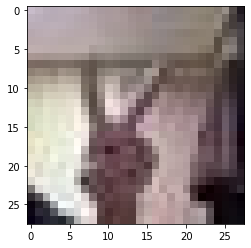

예측확률분포: [0.02285192 0.00120095 0.97594714]
라벨: 1, 예측결과: 2


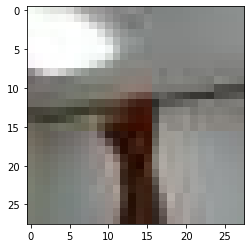

예측확률분포: [0.11492118 0.01250959 0.8725692 ]
라벨: 1, 예측결과: 2


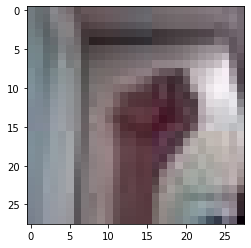

예측확률분포: [0.02590032 0.01100069 0.96309906]
라벨: 1, 예측결과: 2


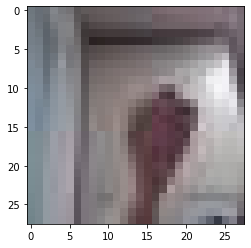

예측확률분포: [3.427243e-05 7.389112e-05 9.998919e-01]
라벨: 0, 예측결과: 2


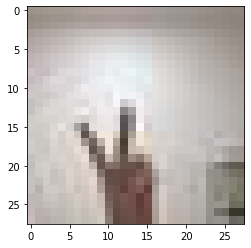

예측확률분포: [8.7776728e-04 3.1221977e-03 9.9600005e-01]
라벨: 0, 예측결과: 2


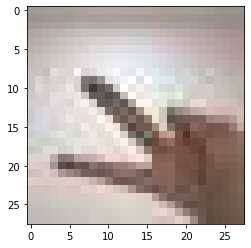

예측확률분포: [7.4125403e-01 2.7949311e-04 2.5846651e-01]
라벨: 2, 예측결과: 0


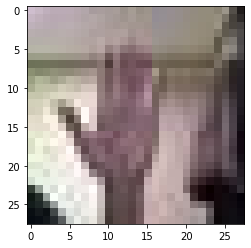

예측확률분포: [1.8396020e-07 2.2830715e-04 9.9977154e-01]
라벨: 1, 예측결과: 2


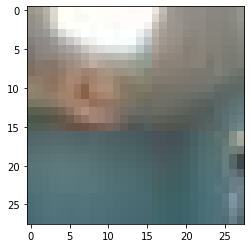

예측확률분포: [6.5697275e-02 2.1232250e-04 9.3409038e-01]
라벨: 1, 예측결과: 2


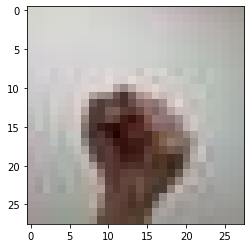

예측확률분포: [9.9999464e-01 3.3834084e-08 5.3609501e-06]
라벨: 1, 예측결과: 0


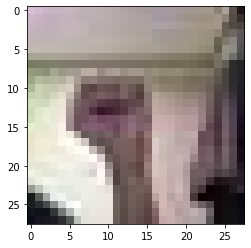

예측확률분포: [0.26231652 0.0049043  0.73277915]
라벨: 0, 예측결과: 2


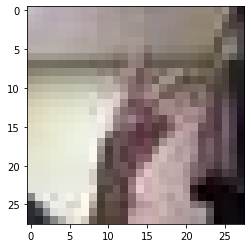

In [29]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

두번의 시도의 결과차이가.. 없.... 엎을까???? 싶다가... 다시 생각해보기로....

학습데이터의 신뢰도는 높였지만... 테스트 데이터의 신뢰도가 떨어진 상태에서... 데스트 데이터의 정확도가 높아질수 있을까? 테스트 데이터에 신뢰도를 높인 학습 데이터를 물타기 해야하나? 아니면.. 신뢰도가 낮은 테스트 데이터를 학습시켜 인덱싱한뒤 기존 학습 데이터를 테스트 해볼까?

3번째 시도... 학습데이터와 테스트 데이터 위치변경... 3000개의 자료실에서 내려받은 데이터를 학습시킨뒤 정확한 포즈로 제작한 데이터로 테스트 해보기.

자료실에서 받은 3000개의 데이터 불러오기 + Resize 하기

In [30]:
from PIL import Image
import os, glob

#PIL 라이브러리 import

import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/3nd_rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/3nd_rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/3nd_rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
가위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
바위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
보 이미지 resize 완료!


학습 데이터 라벨링

In [31]:
import numpy as np

def load_data(img_path, number_of_data=3000):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/3nd_rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path,3000)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (3000, 28, 28, 3)
y_train shape: (3000,)


학습한 이미지 불러오기

라벨:  0


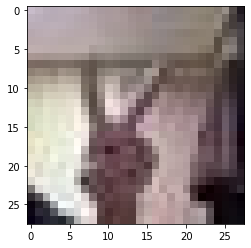

In [32]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

딥러닝 네트워크 설계하기

In [33]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


딥러닝 네트워크 학습시키기

In [34]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))


model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Model에 추가된 Layer 개수:  7
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_19 (Dense)             (

얼마나 잘 만들었는지 확인하기(테스트) 확실한 포즈로 제작한 테스트자료 600개 (600개: 가위 200개, 바위 200개, 보 200개) 이용 이미지 불러와서 리사이징까지...

In [35]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/3nd_rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/3nd_rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/3nd_rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")


    

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/3nd_rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 600)

x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

PIL 라이브러리 import 완료!
200  images to be resized.
200  images resized.
가위 이미지 resize 완료!
200  images to be resized.
200  images resized.
바위 이미지 resize 완료!
200  images to be resized.
200  images resized.
보 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 600 입니다.
x_test shape: (600, 28, 28, 3)
y_test shape: (600,)


위에서 훈련시킨 model을 사용하여 test_accuracy를 측정

19/19 - 0s - loss: 7.8422 - accuracy: 0.3333
test_loss : 7.842181205749512
test_accuracy : 0.3333333432674408
model.predict() 결과 :  [3.3361774e-03 1.3019301e-10 9.9666375e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


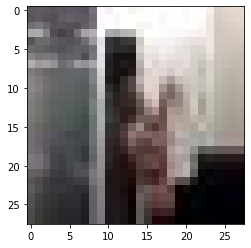

예측확률분포: [1.09795496e-04 1.18604848e-10 9.99890208e-01]
라벨: 1, 예측결과: 2


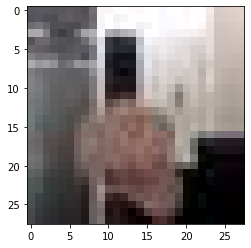

예측확률분포: [1.82840537e-04 1.35193245e-11 9.99817193e-01]
라벨: 0, 예측결과: 2


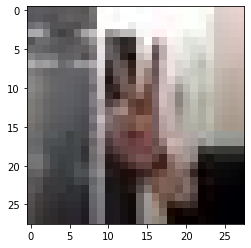

예측확률분포: [1.0830930e-04 7.2602667e-11 9.9989164e-01]
라벨: 1, 예측결과: 2


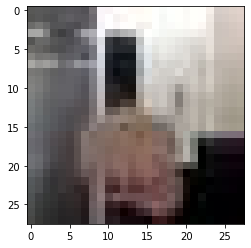

예측확률분포: [9.4894730e-03 1.0561342e-11 9.9051052e-01]
라벨: 0, 예측결과: 2


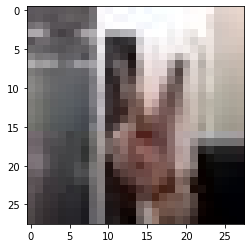

예측확률분포: [2.695750e-04 3.630632e-08 9.997304e-01]
라벨: 1, 예측결과: 2


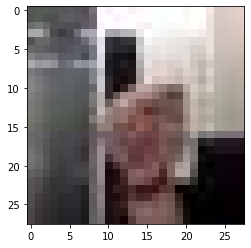

예측확률분포: [1.8264552e-06 8.1818303e-07 9.9999738e-01]
라벨: 1, 예측결과: 2


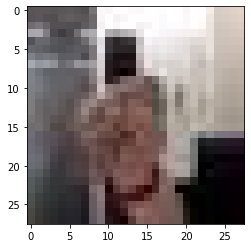

예측확률분포: [9.1102149e-05 8.0686084e-07 9.9990809e-01]
라벨: 1, 예측결과: 2


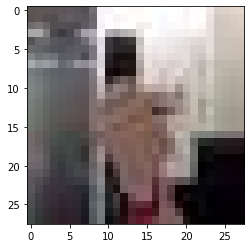

예측확률분포: [8.7451935e-04 5.4651925e-11 9.9912554e-01]
라벨: 0, 예측결과: 2


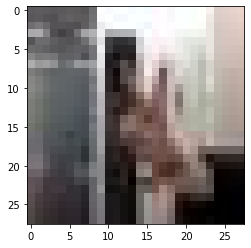

예측확률분포: [1.4662475e-03 5.4478941e-09 9.9853373e-01]
라벨: 1, 예측결과: 2


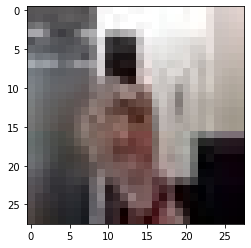

예측확률분포: [9.812365e-04 7.574972e-11 9.990188e-01]
라벨: 0, 예측결과: 2


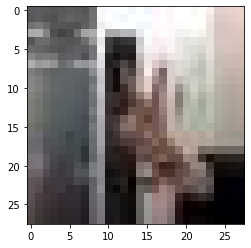

In [36]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

뭔가 확 변화가 생기길 기대햇는데... 33%....

딥러닝 네트워크 학습 방법 수정 시도

합성곱 층 Conv2D추가

In [37]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))



model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Model에 추가된 Layer 개수:  8
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_10 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_20 (Dense)             

새로 훈련시킨 model을 사용하여 test_accuracy를 측정

19/19 - 0s - loss: 6.2129 - accuracy: 0.4000
test_loss : 6.212949275970459
test_accuracy : 0.4000000059604645
model.predict() 결과 :  [1.6364914e-01 6.3987315e-08 8.3635080e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


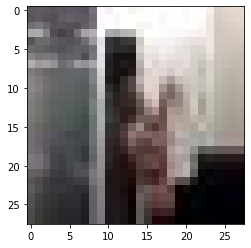

예측확률분포: [1.2157449e-01 6.7875821e-09 8.7842554e-01]
라벨: 0, 예측결과: 2


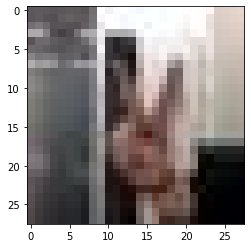

예측확률분포: [3.4051205e-05 1.5313873e-08 9.9996591e-01]
라벨: 1, 예측결과: 2


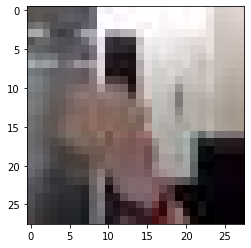

예측확률분포: [5.8519153e-04 1.4282209e-06 9.9941337e-01]
라벨: 1, 예측결과: 2


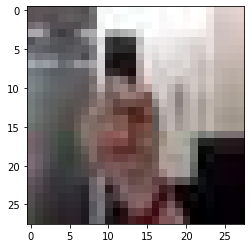

예측확률분포: [6.2869636e-05 2.0205412e-07 9.9993694e-01]
라벨: 1, 예측결과: 2


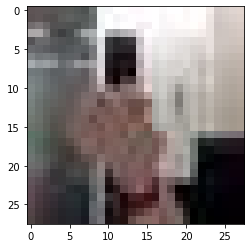

예측확률분포: [1.1109489e-02 1.6332638e-07 9.8889029e-01]
라벨: 0, 예측결과: 2


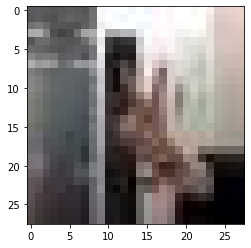

예측확률분포: [2.5508567e-04 4.2947605e-08 9.9974483e-01]
라벨: 1, 예측결과: 2


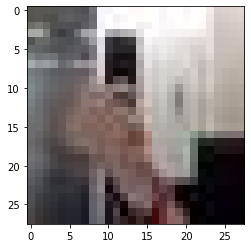

예측확률분포: [8.3877494e-05 9.9751940e-09 9.9991608e-01]
라벨: 1, 예측결과: 2


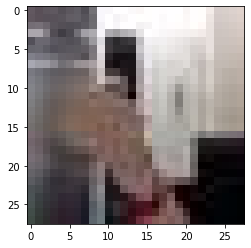

예측확률분포: [1.2353039e-04 2.7113492e-07 9.9987614e-01]
라벨: 1, 예측결과: 2


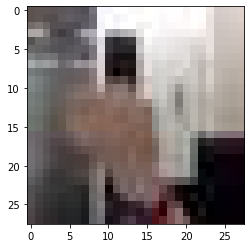

예측확률분포: [4.1034687e-05 4.8800354e-07 9.9995852e-01]
라벨: 1, 예측결과: 2


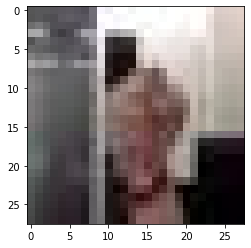

예측확률분포: [5.1556930e-05 1.6645835e-07 9.9994826e-01]
라벨: 1, 예측결과: 2


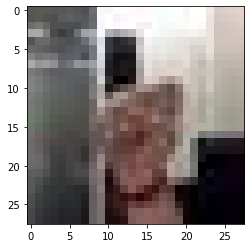

In [38]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

Max pooling 층 MaxPooling2D 추가와 학습횟수 증가시도

In [39]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))


model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

Model에 추가된 Layer 개수:  9
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         

다시 훈련시킨 model을 사용하여 test_accuracy를 측정

19/19 - 0s - loss: 5.2176 - accuracy: 0.4633
test_loss : 5.217597484588623
test_accuracy : 0.4633333384990692
model.predict() 결과 :  [3.6943147e-01 9.4884108e-06 6.3055909e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


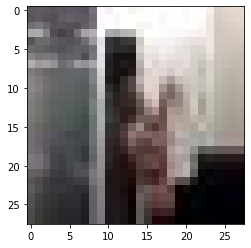

예측확률분포: [9.9036062e-01 6.1361129e-07 9.6387705e-03]
라벨: 1, 예측결과: 0


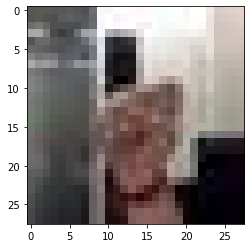

예측확률분포: [7.0432727e-03 4.6842953e-05 9.9290985e-01]
라벨: 0, 예측결과: 2


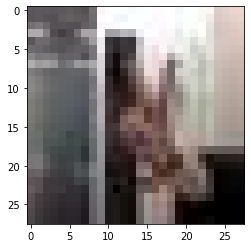

예측확률분포: [8.3977859e-03 2.4895971e-05 9.9157727e-01]
라벨: 1, 예측결과: 2


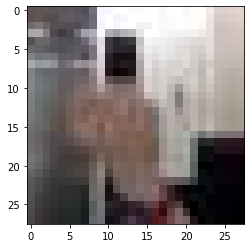

예측확률분포: [6.1856132e-05 8.2545455e-07 9.9993730e-01]
라벨: 1, 예측결과: 2


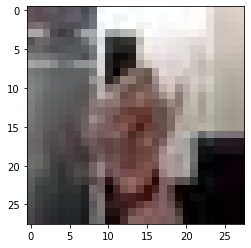

예측확률분포: [9.8477930e-01 3.7654385e-07 1.5220389e-02]
라벨: 1, 예측결과: 0


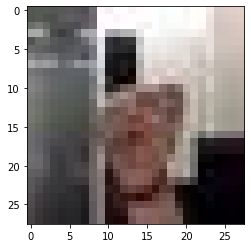

예측확률분포: [6.4100230e-01 1.8028292e-06 3.5899585e-01]
라벨: 2, 예측결과: 0


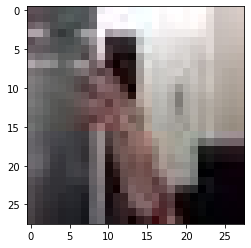

예측확률분포: [5.3476781e-01 1.1790735e-05 4.6522045e-01]
라벨: 1, 예측결과: 0


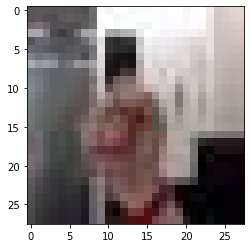

예측확률분포: [9.9561995e-01 8.1732694e-08 4.3799402e-03]
라벨: 1, 예측결과: 0


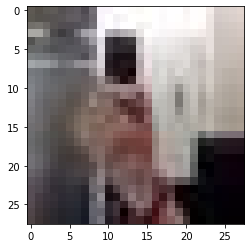

예측확률분포: [9.9561995e-01 8.1732694e-08 4.3799402e-03]
라벨: 1, 예측결과: 0


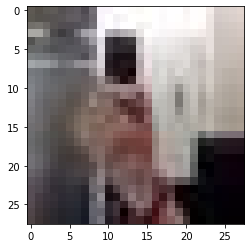

예측확률분포: [2.9270232e-01 3.9880189e-05 7.0725781e-01]
라벨: 1, 예측결과: 2


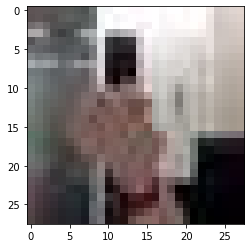

In [40]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

Conv2D 층의 filters 값을 증가 시켜보자...

In [41]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))


model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

Model에 추가된 Layer 개수:  9
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 3, 3, 128)         147584    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_12 (Flatten)         

다시 훈련시킨 model을 사용하여 test_accuracy를 측정

19/19 - 0s - loss: 7.8040 - accuracy: 0.4667
test_loss : 7.804042339324951
test_accuracy : 0.46666666865348816
model.predict() 결과 :  [9.8062462e-01 1.0609119e-13 1.9375423e-02]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


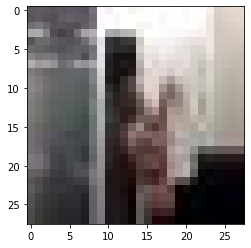

예측확률분포: [8.4530644e-02 2.9277847e-13 9.1546941e-01]
라벨: 0, 예측결과: 2


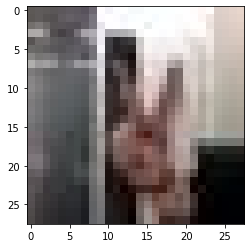

예측확률분포: [9.8417536e-04 2.2808295e-14 9.9901581e-01]
라벨: 0, 예측결과: 2


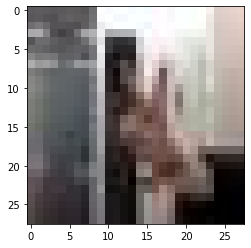

예측확률분포: [6.6400622e-05 1.2113237e-07 9.9993348e-01]
라벨: 1, 예측결과: 2


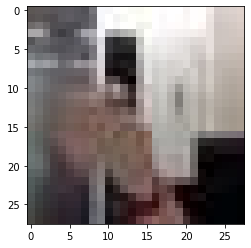

예측확률분포: [9.9188415e-04 1.1522223e-15 9.9900812e-01]
라벨: 0, 예측결과: 2


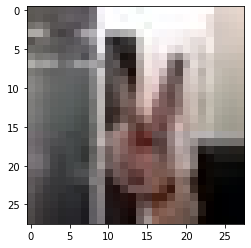

예측확률분포: [2.1884782e-06 9.7581767e-07 9.9999678e-01]
라벨: 1, 예측결과: 2


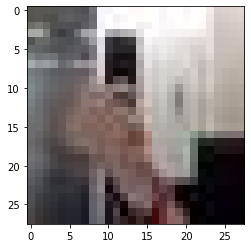

예측확률분포: [1.02772475e-08 8.16434476e-09 1.00000000e+00]
라벨: 1, 예측결과: 2


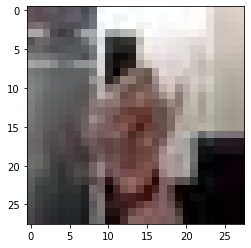

예측확률분포: [4.32553023e-01 1.04335336e-13 5.67446947e-01]
라벨: 0, 예측결과: 2


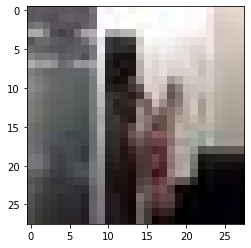

예측확률분포: [4.3511271e-05 1.3940857e-09 9.9995649e-01]
라벨: 1, 예측결과: 2


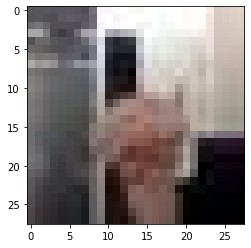

예측확률분포: [1.4911556e-01 2.5181524e-12 8.5088450e-01]
라벨: 0, 예측결과: 2


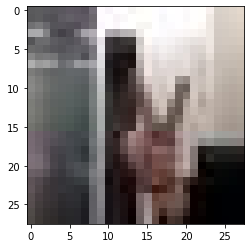

예측확률분포: [8.8314066e-04 2.2951356e-04 9.9888736e-01]
라벨: 1, 예측결과: 2


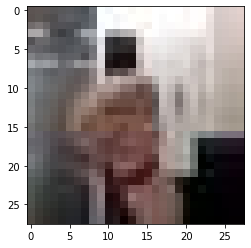

In [42]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

이 방법두 아닌가보다... 확실히 40% 이상의 정확도를 보여주지만... 목표정확도는 60%니깐..

마지막 방법을 써보자..

학습 데이터두 정확한 데이터, 테스트 데이터도 정확한 데이터..

정확한 학습 데이터 3000개 (가위 : 1000개, 바위 : 1000개, 보 : 1000개)

In [59]:
from PIL import Image
import os, glob

#PIL 라이브러리 import

import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/4th_rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/4th_rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/4th_rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
가위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
바위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
보 이미지 resize 완료!


학습 데이터 라벨링

In [60]:
import numpy as np

def load_data(img_path, number_of_data=3000):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/4th_rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path,3000)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (3000, 28, 28, 3)
y_train shape: (3000,)


학습한 이미지 불러오기

라벨:  0


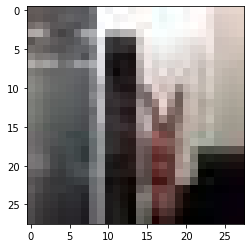

In [61]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

딥러닝 네트워크 설계하기

In [62]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


딥러닝 네트워크 학습시키기

In [63]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))


model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Model에 추가된 Layer 개수:  7
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_29 (Dense)             

얼마나 잘 만들었는지 확인하기(테스트) 확실한 포즈로 제작한 테스트자료 600개 (600개: 가위 200개, 바위 200개, 보 200개) 이용 이미지 불러와서 리사이징까지...

In [64]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/4th_rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/4th_rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/4th_rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")


    

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/4th_rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 600)

x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

PIL 라이브러리 import 완료!
200  images to be resized.
200  images resized.
가위 이미지 resize 완료!
200  images to be resized.
200  images resized.
바위 이미지 resize 완료!
200  images to be resized.
200  images resized.
보 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 600 입니다.
x_test shape: (600, 28, 28, 3)
y_test shape: (600,)


위에서 훈련시킨 model을 사용하여 test_accuracy를 측정

19/19 - 0s - loss: 9.2288e-05 - accuracy: 1.0000
test_loss : 9.228848648490384e-05
test_accuracy : 1.0
model.predict() 결과 :  [9.9999988e-01 4.1186173e-08 1.3786649e-07]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


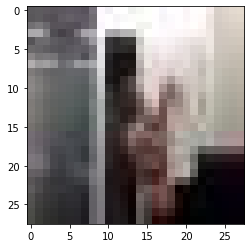

In [67]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()




학습데이터와 테스트 데이터가 동일한 경우 정확히 100%의 정확도가 나오는것을 확인했다.

그럼 정확한 포즈로 제작한 학습데이터 3000개(가위 : 1000개, 바위 : 1000개, 보 : 1000개)에 블확실한 포즈로 찍은 테스트 데이터 100개를 최종적으로 테스트 해보자.


In [68]:
from PIL import Image
import os, glob

#PIL 라이브러리 import

import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/5th_rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/5th_rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/5th_rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
가위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
바위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
보 이미지 resize 완료!


학습 데이터 라벨링

In [69]:
import numpy as np

def load_data(img_path, number_of_data=3000):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/5th_rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path,3000)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (3000, 28, 28, 3)
y_train shape: (3000,)


학습한 이미지 불러오기

라벨:  0


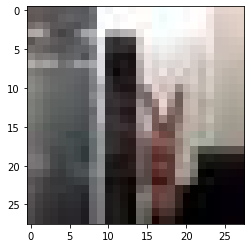

In [70]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

딥러닝 네트워크 설계하기

In [71]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


딥러닝 네트워크 학습시키기

In [72]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))


model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Model에 추가된 Layer 개수:  7
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_31 (Dense)             

얼마나 잘 만들었는지 확인하기(테스트)
확실한 포즈로 제작한 테스트자료 300개 (300개: 가위 100개, 바위 100개, 보 100개) 이용
이미지 불러와서 리사이징까지...

In [74]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/5th_rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/5th_rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/5th_rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")


    

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/01/5th_rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 300)

x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

PIL 라이브러리 import 완료!
100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


위에서 훈련시킨 model을 사용하여 test_accuracy를 측정

10/10 - 0s - loss: 5.1196 - accuracy: 0.5133
test_loss : 5.119593620300293
test_accuracy : 0.5133333206176758
model.predict() 결과 :  [8.1143105e-01 1.7340977e-08 1.8856893e-01]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


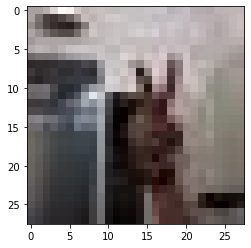

예측확률분포: [1.3251406e-01 3.4432680e-06 8.6748254e-01]
라벨: 1, 예측결과: 2


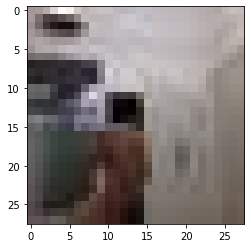

예측확률분포: [2.6486236e-01 2.6221983e-06 7.3513502e-01]
라벨: 1, 예측결과: 2


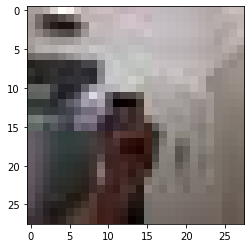

예측확률분포: [7.5412583e-01 3.6152443e-05 2.4583800e-01]
라벨: 1, 예측결과: 0


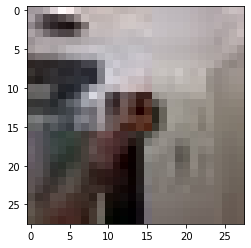

예측확률분포: [8.2921338e-01 4.8204591e-08 1.7078657e-01]
라벨: 1, 예측결과: 0


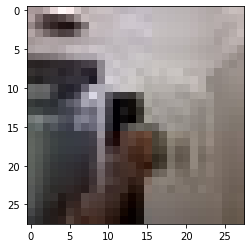

예측확률분포: [9.1298008e-01 5.9107887e-08 8.7019809e-02]
라벨: 1, 예측결과: 0


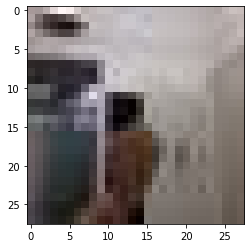

예측확률분포: [4.273409e-01 8.006011e-06 5.726511e-01]
라벨: 1, 예측결과: 2


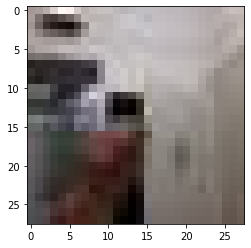

예측확률분포: [8.8336647e-01 4.4437093e-07 1.1663307e-01]
라벨: 1, 예측결과: 0


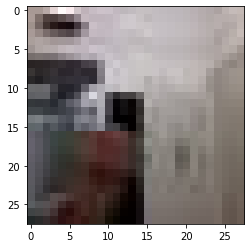

예측확률분포: [6.6979164e-01 7.5236759e-09 3.3020833e-01]
라벨: 2, 예측결과: 0


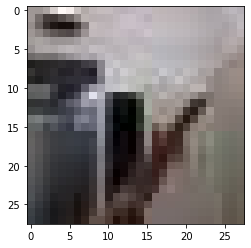

예측확률분포: [3.9891827e-01 1.3599067e-07 6.0108161e-01]
라벨: 0, 예측결과: 2


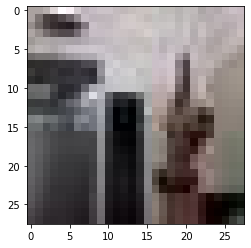

예측확률분포: [9.8814672e-01 2.2481949e-08 1.1853295e-02]
라벨: 2, 예측결과: 0


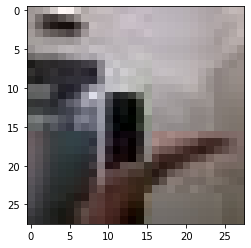

In [75]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

많은양의 정확한 데이터로 학습을 하니 정확도가 올라갓다. 첫 50% 돌파.......

딥러닝 네트워크 학습 방법 수정 시도

합성곱 층 Conv2D추가

In [76]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))



model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Model에 추가된 Layer 개수:  8
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_16 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_32 (Dense)             

새로 훈련시킨 model을 사용하여 test_accuracy를 측정

10/10 - 0s - loss: 9.3782 - accuracy: 0.3333
test_loss : 9.378190040588379
test_accuracy : 0.3333333432674408
model.predict() 결과 :  [9.999696e-01 2.452968e-08 3.039404e-05]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


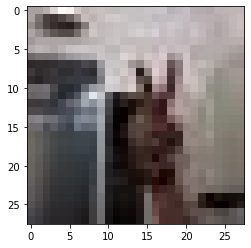

예측확률분포: [1.0000000e+00 6.5116350e-11 1.7421361e-09]
라벨: 1, 예측결과: 0


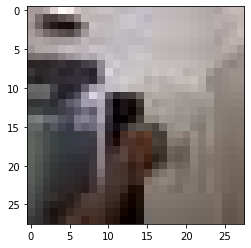

예측확률분포: [9.9640357e-01 3.5689061e-03 2.7605181e-05]
라벨: 1, 예측결과: 0


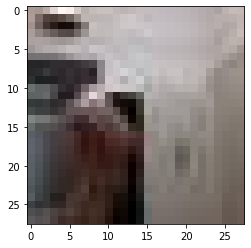

예측확률분포: [9.9999976e-01 9.9624202e-08 6.6917963e-08]
라벨: 1, 예측결과: 0


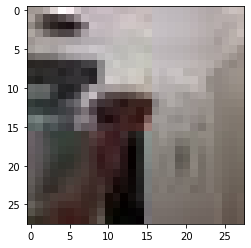

예측확률분포: [9.999995e-01 1.725062e-11 4.259439e-07]
라벨: 2, 예측결과: 0


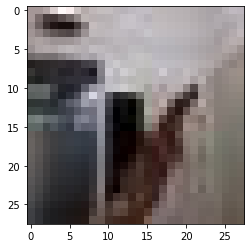

예측확률분포: [8.9142674e-01 8.8979330e-05 1.0848434e-01]
라벨: 2, 예측결과: 0


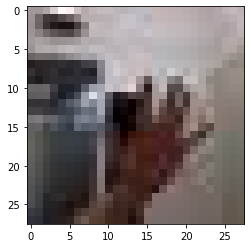

예측확률분포: [1.0000000e+00 4.1818184e-11 1.7432630e-09]
라벨: 1, 예측결과: 0


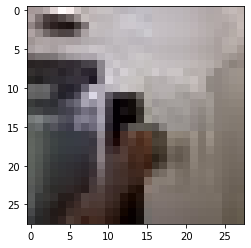

예측확률분포: [1.0000000e+00 4.1818184e-11 1.7432630e-09]
라벨: 1, 예측결과: 0


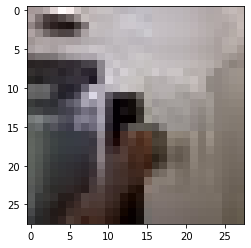

예측확률분포: [1.0000000e+00 1.3445832e-10 1.0907058e-10]
라벨: 1, 예측결과: 0


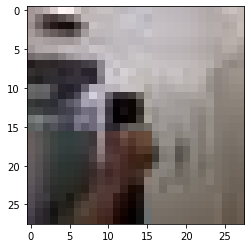

예측확률분포: [1.0000000e+00 4.1818184e-11 1.7432630e-09]
라벨: 1, 예측결과: 0


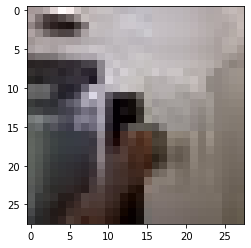

예측확률분포: [1.0000000e+00 5.7445276e-10 4.0753279e-11]
라벨: 1, 예측결과: 0


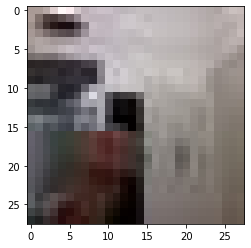

In [77]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

Max pooling 층 MaxPooling2D 추가와 학습횟수 증가시도

In [78]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))


model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

Model에 추가된 Layer 개수:  9
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_17 (Flatten)         

다시 훈련시킨 model을 사용하여 test_accuracy를 측정

10/10 - 0s - loss: 4.0653 - accuracy: 0.2800
test_loss : 4.065276622772217
test_accuracy : 0.2800000011920929
model.predict() 결과 :  [4.0726494e-03 2.2596761e-04 9.9570137e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


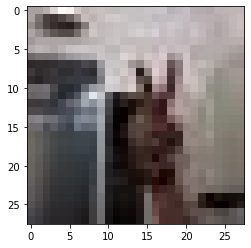

예측확률분포: [6.8985128e-01 1.6841856e-05 3.1013182e-01]
라벨: 2, 예측결과: 0


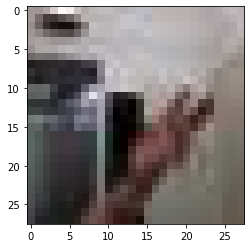

예측확률분포: [2.794412e-02 3.633640e-05 9.720195e-01]
라벨: 0, 예측결과: 2


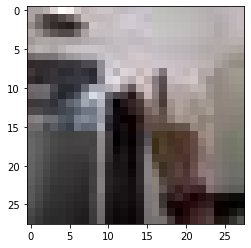

예측확률분포: [9.7432083e-01 1.0216870e-06 2.5678186e-02]
라벨: 2, 예측결과: 0


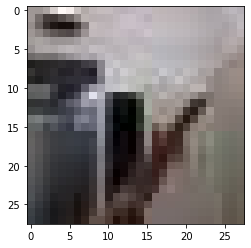

예측확률분포: [8.6522704e-01 5.0291525e-05 1.3472261e-01]
라벨: 1, 예측결과: 0


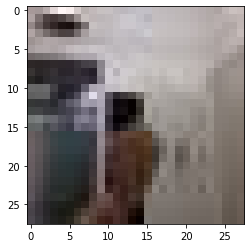

예측확률분포: [0.00123771 0.00174758 0.99701476]
라벨: 1, 예측결과: 2


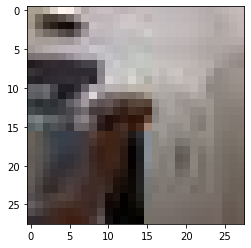

예측확률분포: [9.9485874e-01 1.1466815e-08 5.1412550e-03]
라벨: 2, 예측결과: 0


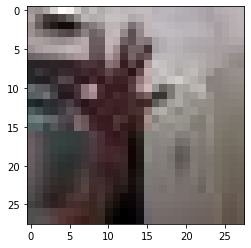

예측확률분포: [8.8626862e-01 2.2545879e-04 1.1350590e-01]
라벨: 1, 예측결과: 0


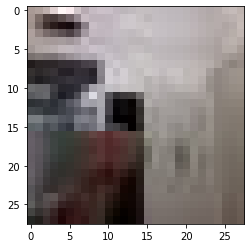

예측확률분포: [0.7156874  0.01263255 0.27168   ]
라벨: 2, 예측결과: 0


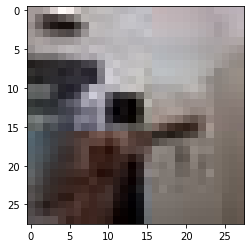

예측확률분포: [0.0013762  0.00691863 0.9917052 ]
라벨: 1, 예측결과: 2


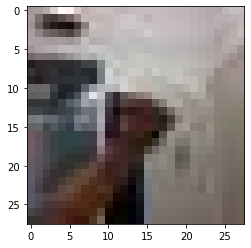

예측확률분포: [9.76796687e-01 1.19743945e-05 2.31912863e-02]
라벨: 1, 예측결과: 0


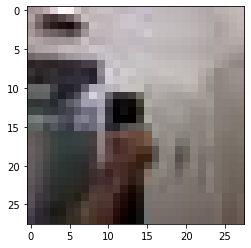

In [79]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

Conv2D 층의 filters 값을 증가 시켜보자...

In [80]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))


model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

Model에 추가된 Layer 개수:  9
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 3, 3, 128)         147584    
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_18 (Flatten)         

다시 훈련시킨 model을 사용하여 test_accuracy를 측정

10/10 - 0s - loss: 3.5367 - accuracy: 0.3333
test_loss : 3.536736249923706
test_accuracy : 0.3333333432674408
model.predict() 결과 :  [8.736316e-04 9.192194e-05 9.990345e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


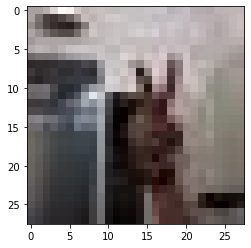

예측확률분포: [0.00367579 0.00340969 0.99291456]
라벨: 1, 예측결과: 2


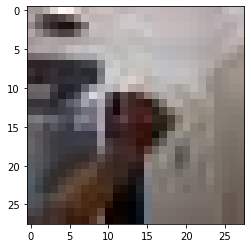

예측확률분포: [2.1140938e-04 5.9728307e-05 9.9972886e-01]
라벨: 0, 예측결과: 2


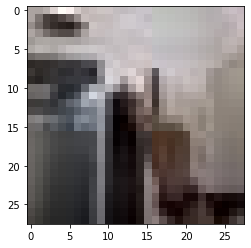

예측확률분포: [0.01478864 0.00534732 0.979864  ]
라벨: 1, 예측결과: 2


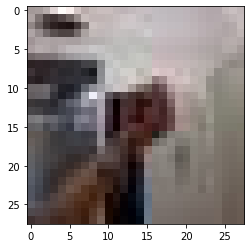

예측확률분포: [2.0905488e-04 6.2710650e-02 9.3708032e-01]
라벨: 1, 예측결과: 2


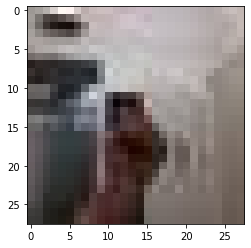

예측확률분포: [9.9872053e-01 6.2369563e-06 1.2732702e-03]
라벨: 2, 예측결과: 0


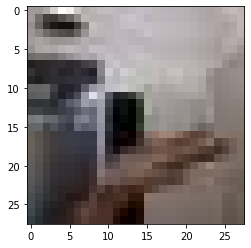

예측확률분포: [7.0832994e-06 4.5212117e-05 9.9994767e-01]
라벨: 0, 예측결과: 2


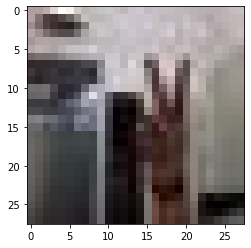

예측확률분포: [1.0465356e-04 7.9490441e-05 9.9981588e-01]
라벨: 0, 예측결과: 2


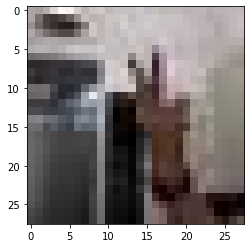

예측확률분포: [1.1546726e-05 2.3307750e-05 9.9996519e-01]
라벨: 0, 예측결과: 2


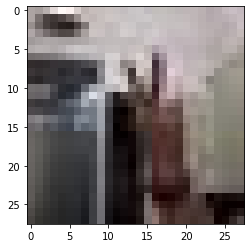

예측확률분포: [1.4980960e-04 7.1370763e-01 2.8614256e-01]
라벨: 2, 예측결과: 1


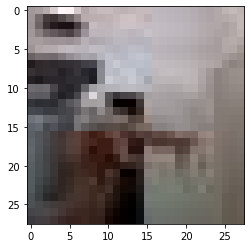

예측확률분포: [2.0333095e-05 7.3397082e-01 2.6600888e-01]
라벨: 2, 예측결과: 1


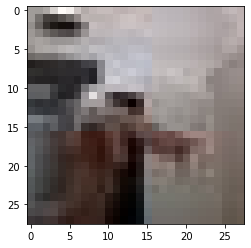

In [81]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

학습데이터의 신뢰도가 좋아지면 확실히 정확도가 올라가긴 했다... 

처음으로 50% 이상의 정확도를 확보햇다..

하지만 다른 시도는 오히려 정확도가 떨어졌다.

In [82]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))


model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

Model에 추가된 Layer 개수:  7
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_39 (Dense)             

첫 시도에서 학습시도만 바꾸고 다시 도전

10/10 - 0s - loss: 5.5548 - accuracy: 0.3967
test_loss : 5.554752349853516
test_accuracy : 0.39666667580604553
model.predict() 결과 :  [8.3202070e-01 1.9388311e-08 1.6797929e-01]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


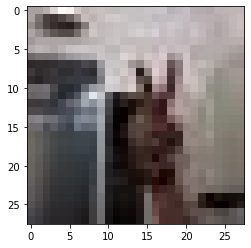

예측확률분포: [9.8254400e-01 4.5658012e-06 1.7451389e-02]
라벨: 2, 예측결과: 0


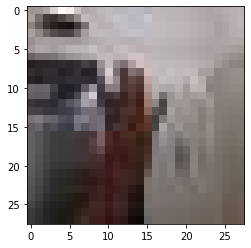

예측확률분포: [9.9997270e-01 1.6937256e-07 2.7180375e-05]
라벨: 1, 예측결과: 0


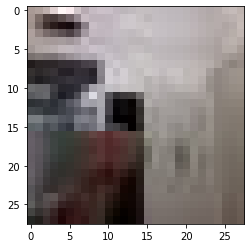

예측확률분포: [9.8252100e-01 2.0113083e-08 1.7478995e-02]
라벨: 2, 예측결과: 0


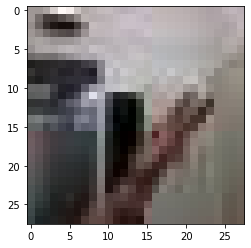

예측확률분포: [9.9997389e-01 1.7922405e-07 2.5889143e-05]
라벨: 1, 예측결과: 0


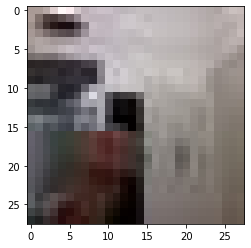

예측확률분포: [9.9987817e-01 1.8042579e-07 1.2157269e-04]
라벨: 2, 예측결과: 0


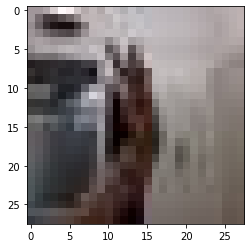

예측확률분포: [9.9955517e-01 1.2787247e-06 4.4346700e-04]
라벨: 1, 예측결과: 0


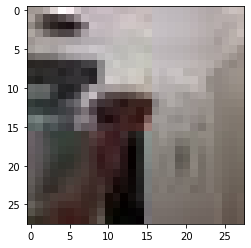

예측확률분포: [9.9996305e-01 1.1545732e-07 3.6787107e-05]
라벨: 2, 예측결과: 0


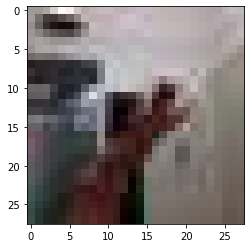

예측확률분포: [8.3821863e-01 2.1006666e-05 1.6176039e-01]
라벨: 2, 예측결과: 0


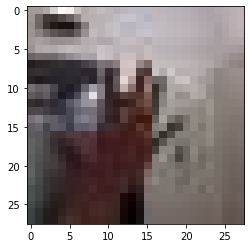

예측확률분포: [6.3078803e-01 5.2151740e-06 3.6920676e-01]
라벨: 2, 예측결과: 0


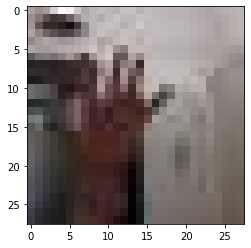

예측확률분포: [9.999734e-01 6.608808e-07 2.581763e-05]
라벨: 1, 예측결과: 0


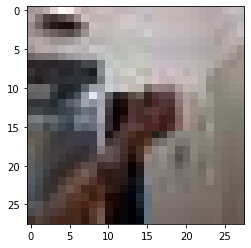

In [83]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

무의미한 학습시도는 의미가 없는것 같다.

In [84]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))


model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(6, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Model에 추가된 Layer 개수:  7
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_41 (Dense)             

다시 도전...

10/10 - 0s - loss: 5.3981 - accuracy: 0.4800
test_loss : 5.398058891296387
test_accuracy : 0.47999998927116394
model.predict() 결과 :  [9.9950981e-01 1.5059276e-10 4.9020746e-04 5.1192378e-14 4.6455185e-13
 1.3289426e-15]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


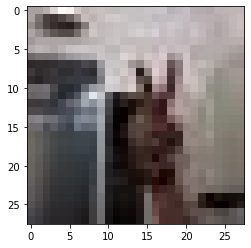

예측확률분포: [9.9825257e-01 2.3772760e-08 1.7474131e-03 2.6046840e-12 1.0326808e-11
 3.9591621e-14]
라벨: 2, 예측결과: 0


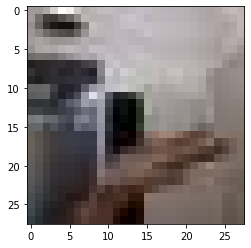

예측확률분포: [9.9986744e-01 6.1595358e-08 1.3246633e-04 1.1492891e-12 9.9473355e-12
 1.6468316e-14]
라벨: 1, 예측결과: 0


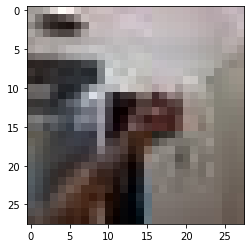

예측확률분포: [9.2319232e-01 4.7970461e-05 7.6759771e-02 1.4996965e-10 6.4810596e-10
 5.6607939e-12]
라벨: 1, 예측결과: 0


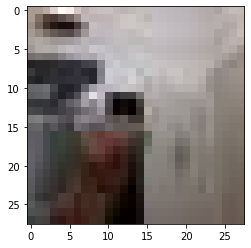

예측확률분포: [9.9743181e-01 3.1589217e-10 2.5682063e-03 3.3651708e-13 8.7529631e-13
 4.4139895e-15]
라벨: 2, 예측결과: 0


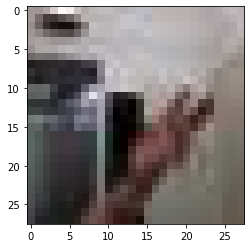

예측확률분포: [9.9848831e-01 1.1895611e-10 1.5116264e-03 1.3889965e-13 4.0841546e-13
 1.7214925e-15]
라벨: 2, 예측결과: 0


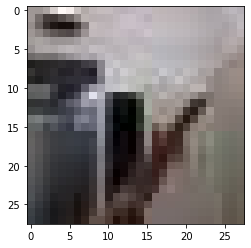

예측확률분포: [9.9990749e-01 1.1390282e-08 9.2460170e-05 7.0741801e-13 6.0728375e-12
 8.6611440e-15]
라벨: 2, 예측결과: 0


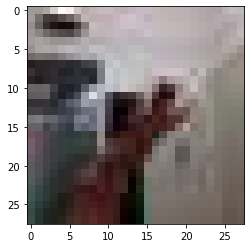

예측확률분포: [9.9952900e-01 8.4771972e-07 4.7012800e-04 5.7277941e-12 4.4280406e-11
 1.1590108e-13]
라벨: 1, 예측결과: 0


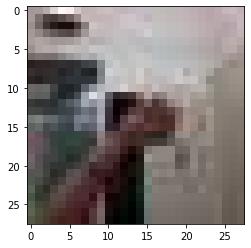

예측확률분포: [9.9985325e-01 4.5123804e-07 1.4627130e-04 4.1397085e-12 3.8884090e-11
 5.7976058e-14]
라벨: 1, 예측결과: 0


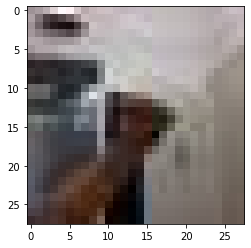

예측확률분포: [9.3197221e-01 1.5117130e-06 6.8026230e-02 7.4927696e-11 2.1640972e-10
 1.8896753e-12]
라벨: 1, 예측결과: 0


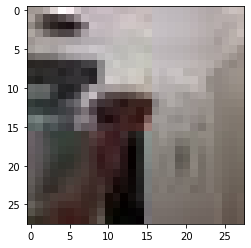

예측확률분포: [5.1648903e-01 1.0883109e-09 4.8351100e-01 1.8686274e-12 2.0471602e-12
 7.3023788e-14]
라벨: 2, 예측결과: 0


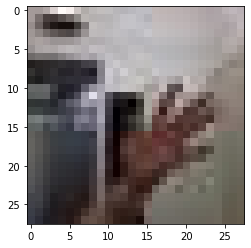

In [85]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

나올때까지 변경해보자..


In [86]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))



model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(6, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Model에 추가된 Layer 개수:  9
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_21 (Flatten)         

10/10 - 0s - loss: 2.4150 - accuracy: 0.3900
test_loss : 2.415003776550293
test_accuracy : 0.38999998569488525
model.predict() 결과 :  [1.35738507e-03 1.17305825e-02 9.86912012e-01 4.50990792e-15
 1.11764723e-13 4.76690492e-14]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


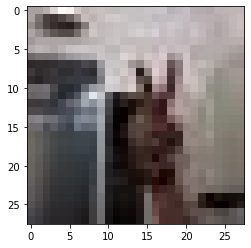

예측확률분포: [1.2339755e-03 1.0931417e-01 8.8945186e-01 5.8232990e-15 4.8590803e-13
 1.3966232e-13]
라벨: 1, 예측결과: 2


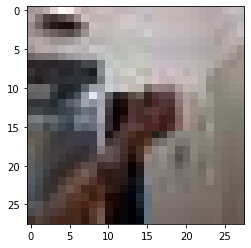

예측확률분포: [3.3372841e-04 2.4385622e-01 7.5581002e-01 4.8974645e-15 9.3785266e-13
 3.2104918e-13]
라벨: 1, 예측결과: 2


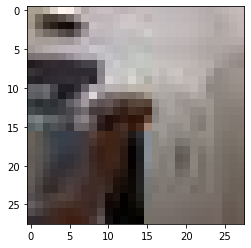

예측확률분포: [1.2282741e-03 1.1881664e-02 9.8689008e-01 4.6043377e-15 1.5910027e-13
 6.4009846e-14]
라벨: 0, 예측결과: 2


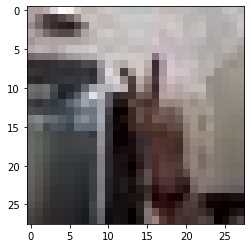

예측확률분포: [4.5041415e-01 2.6397344e-01 2.8561234e-01 1.1704831e-14 1.7372966e-12
 1.5168643e-12]
라벨: 1, 예측결과: 0


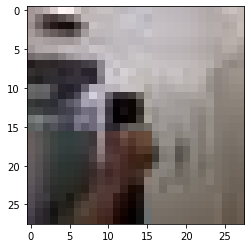

예측확률분포: [2.5625572e-02 1.7461170e-01 7.9976273e-01 3.7129782e-15 3.7436094e-13
 1.9870217e-13]
라벨: 0, 예측결과: 2


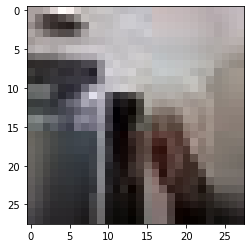

예측확률분포: [2.7956194e-01 2.1325469e-01 5.0718337e-01 1.4415889e-14 1.3791587e-12
 1.0951031e-12]
라벨: 1, 예측결과: 2


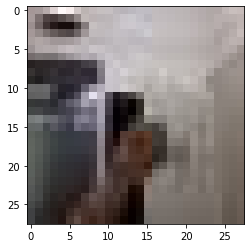

예측확률분포: [6.9269683e-04 2.5774585e-03 9.9672985e-01 6.9749854e-16 1.7715308e-14
 8.0408829e-15]
라벨: 0, 예측결과: 2


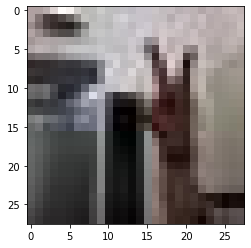

예측확률분포: [5.8501843e-02 2.8074270e-03 9.3869072e-01 8.0685055e-15 1.4986124e-13
 1.3997088e-13]
라벨: 0, 예측결과: 2


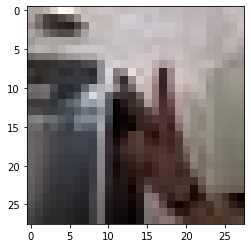

예측확률분포: [2.8292425e-03 7.4516274e-02 9.2265445e-01 2.2292037e-15 3.4518582e-13
 1.1842430e-13]
라벨: 0, 예측결과: 2


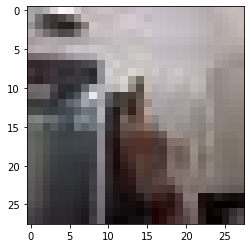

예측확률분포: [6.6150981e-01 3.3260213e-04 3.3815756e-01 1.3589634e-13 9.4153157e-13
 4.6778167e-12]
라벨: 1, 예측결과: 0


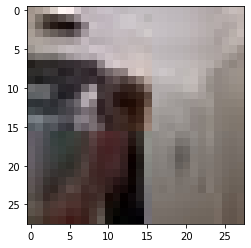

In [87]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

뭘 손대야 하나....

In [94]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))




model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=5)

Model에 추가된 Layer 개수:  7
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_51 (Dense)             

10/10 - 0s - loss: 5.0248 - accuracy: 0.5200
test_loss : 5.024798393249512
test_accuracy : 0.5199999809265137
model.predict() 결과 :  [1.2329502e-01 9.6050512e-10 8.7670499e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


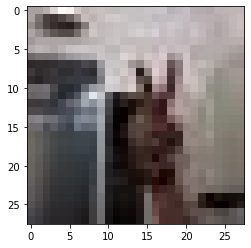

예측확률분포: [4.0121868e-01 2.0526666e-06 5.9877920e-01]
라벨: 1, 예측결과: 2


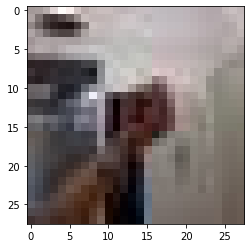

예측확률분포: [2.5773785e-01 2.3780503e-06 7.4225980e-01]
라벨: 1, 예측결과: 2


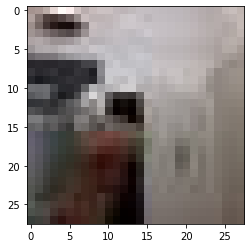

예측확률분포: [7.8173292e-01 1.5510036e-06 2.1826546e-01]
라벨: 1, 예측결과: 0


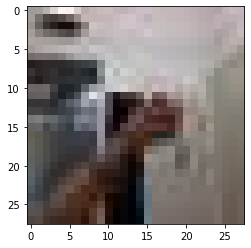

예측확률분포: [1.3118351e-01 2.5168474e-09 8.6881655e-01]
라벨: 0, 예측결과: 2


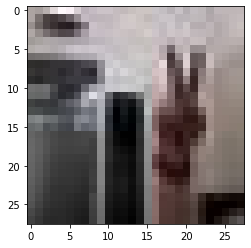

예측확률분포: [8.1274843e-01 4.0538939e-08 1.8725157e-01]
라벨: 2, 예측결과: 0


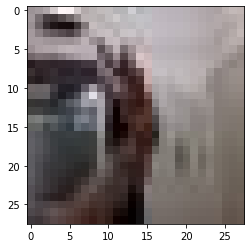

예측확률분포: [8.2205498e-01 2.0802649e-07 1.7794488e-01]
라벨: 1, 예측결과: 0


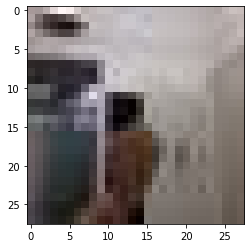

예측확률분포: [7.9500180e-01 1.5126070e-06 2.0499662e-01]
라벨: 1, 예측결과: 0


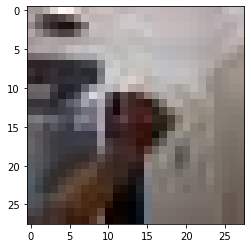

예측확률분포: [8.7033165e-01 4.0069949e-07 1.2966794e-01]
라벨: 1, 예측결과: 0


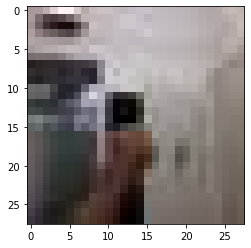

예측확률분포: [8.2205498e-01 2.0802649e-07 1.7794488e-01]
라벨: 1, 예측결과: 0


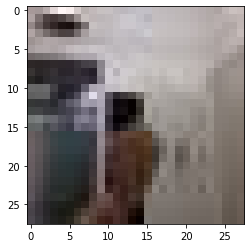

예측확률분포: [4.0121868e-01 2.0526666e-06 5.9877920e-01]
라벨: 1, 예측결과: 2


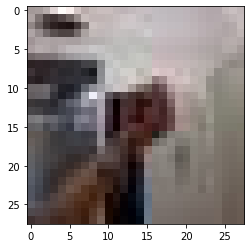

In [95]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

60%는.... 꿈의 숫자인것 같다.. 뭔가 잡힐것 같으면서두... 다시금 멀어지는 듯한... ㅜ.ㅜ